1、Significant earthquakes since 2150 B.C.

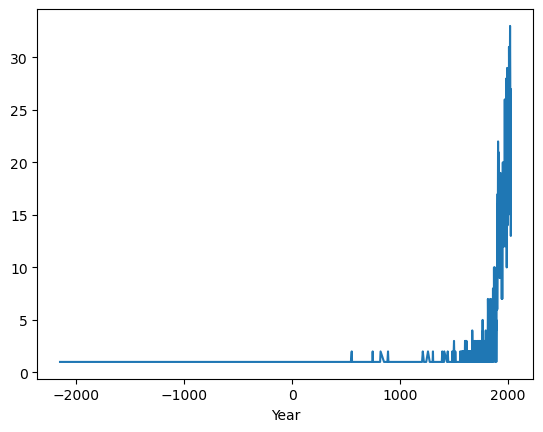

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

quake = pd.read_csv(r'F:\ESE5023_python\work2\Sig_Eqs.tsv', sep='\t')

#1.1
death_sort = quake[['Location Name','Deaths']].groupby(['Location Name']).sum().sort_values('Deaths', ascending=False)
death_sort.head(10)
#1.2
quake[quake['Mag']>6.0].groupby(['Year']).count()['Mag'].plot()
plt.show()
#1.3
def CountEq_LargestEq(quake, country):
    co_data = quake[quake['Location Name'] == country]
    if len(co_data)>0:
        valid = co_data[co_data['Mag'].notna()]
        total_quake = len(valid)

        if total_quake > 0:
            max_index = valid['Mag'].idxmax()
            maxdata = valid.loc[max_index]
            year = int(maxdata['Year'])
            month = int(maxdata['Mo']) if not pd.isna(maxdata['Mo']) else 1
            day = int(maxdata['Dy']) if not pd.isna(maxdata['Dy']) else 1
            if year<0:
                date = f"{abs(year)} B.C.-{month}-{day}"
            else:
                date = f"{year}-{month}-{day}"
        else:
            total_quake = 0
            date = "no records"  
    else:
        total_quake = 0
        date = "no records"      
        
    return total_quake, date

all_countries = quake['Location Name'].unique()
result = []
for country in all_countries:
    total_quake, date = CountEq_LargestEq(quake, country)
    result.append({
        'Country' : country,
        'Total earthquakes' : total_quake,
        'The largest date' : date
    })
result_df = pd.DataFrame(result, columns=['Country', 'Total earthquakes', 'The largest date'])
false_sort = result_df.sort_values('Total earthquakes', ascending=False)
false_sort.to_excel('country_results.xlsx', index=False)



2、Wind speed in Shenzhen from 2010 to 2020

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24016\435132476.py:7: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'F:\ESE5023_python\work2\2281305.csv')


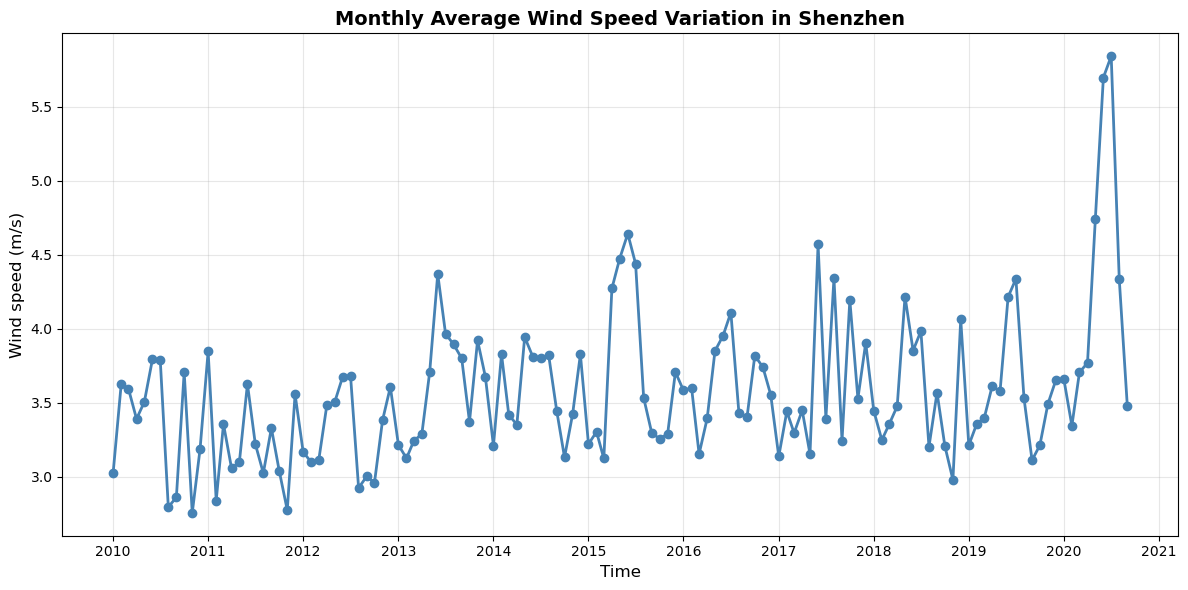

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np

df = pd.read_csv(r'F:\ESE5023_python\work2\2281305.csv')
def get_wind_speed(wnd):
    try:
        if pd.isna(wnd) or wnd == '':
            return np.nan
        
        parts = str(wnd).split(',')
        if len(parts) >= 5:
            
            wind_direction = parts[0]      
            direction_quality = parts[1]  
            direction_type = parts[2]   
            wind_speed_raw = parts[3]   
            speed_quality = parts[4]     
            
            if (wind_direction != '999' and 
                direction_quality == '1' and 
                direction_type in ['N', 'R', 'C'] and 
                wind_speed_raw != '9999' and 
                speed_quality == '1'):
        
                wind_speed = float(wind_speed_raw) / 10.0
                return wind_speed
        
        return np.nan
    except:
        return np.nan

wind_data = pd.DataFrame({
    'datetime': pd.to_datetime(df['DATE']),
    'wind_speed': df['WND'].apply(get_wind_speed)
})
wind_data = wind_data.dropna(subset=['wind_speed']) # delete nan
wind_data['year_month'] = wind_data['datetime'].dt.to_period('M')
monthly_avg = wind_data.groupby(['year_month'])['wind_speed'].mean().reset_index()
monthly_avg['date'] = monthly_avg['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['date'], monthly_avg['wind_speed'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')

plt.title('Monthly Average Wind Speed Variation in Shenzhen', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Wind speed (m/s)', fontsize=12)

from matplotlib.dates import YearLocator, DateFormatter

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

3、 Explore a data set